In [168]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, metrics, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

In [91]:
df = pd.read_csv(os.path.join('..', 'datasets', 'auto-mpg.csv'))

In [92]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

### CLEAN UP DATA SET

In [93]:
df.drop('origin', axis = 1, inplace = True)
df.columns

Index([u'mpg', u'cylinders', u'displacement', u'horsepower', u'weight',
       u'acceleration', u'model_year', u'car_name'],
      dtype='object')

In [94]:
df.cylinders.unique()

array([8, 4, 6, 3, 5])

In [95]:
df.displacement.unique()

array([ 307. ,  350. ,  318. ,  304. ,  302. ,  429. ,  454. ,  440. ,
        455. ,  390. ,  383. ,  340. ,  400. ,  113. ,  198. ,  199. ,
        200. ,   97. ,  110. ,  107. ,  104. ,  121. ,  360. ,  140. ,
         98. ,  232. ,  225. ,  250. ,  351. ,  258. ,  122. ,  116. ,
         79. ,   88. ,   71. ,   72. ,   91. ,   97.5,   70. ,  120. ,
         96. ,  108. ,  155. ,   68. ,  114. ,  156. ,   76. ,   83. ,
         90. ,  231. ,  262. ,  134. ,  119. ,  171. ,  115. ,  101. ,
        305. ,   85. ,  130. ,  168. ,  111. ,  260. ,  151. ,  146. ,
         80. ,   78. ,  105. ,  131. ,  163. ,   89. ,  267. ,   86. ,
        183. ,  141. ,  173. ,  135. ,   81. ,  100. ,  145. ,  112. ,
        181. ,  144. ])

In [96]:
df.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

## Correlation

In [97]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000

In [98]:
y = df.mpg
x = df[ ['cylinders','displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]

In [99]:
model = smf.ols(formula = 'y ~ x ', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          3.79e-135
Time:                        19:29:46   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -14.5353      4.764     -3.051      0.002       -23.902    -5.169
x[0]          -0.3299      0.332     -0.993      0.321        -0.983     0.323
x[1]           0.0077      0.007      1.044      0.297        -0.007     0.022
x[2]          -0.0004      0.014     -0.028      0.977        -0.028     0.027
x[3]          -0.0068      0.001    -10.141      0.000        -0.008    -0.005
x[4]           0.0853      0.102      0.836      0.404        -0.115     0.286
x[5]           0.7534      0.053     14.318      0.000         0.650     0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
model = smf.ols(formula = 'mpg ~ model_year', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     200.0
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           4.84e-37
Time:                        19:29:46   Log-Likelihood:                -1301.2
No. Observations:                 398   AIC:                             2606.
Df Residuals:                     396   BIC:                             2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -69.5556      6.589    -10.556      0.000       -82.510   -56.602
model_year     1.2244      0.087     14.141      0.000         1.054     1.395
==============================================================================
Omnibus:                       22.686   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.247
Skew:                           0.383   Prob(JB):                     0.000297
Kurtosis:                       2.373   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

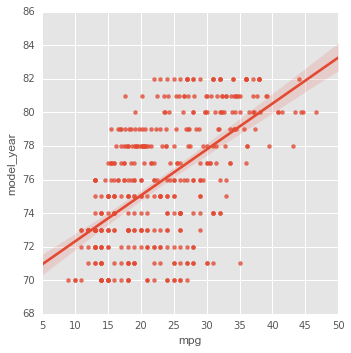

In [101]:
sns.lmplot('mpg', 'model_year', df)

In [102]:
model = smf.ols(formula = 'mpg ~ acceleration + model_year + acceleration * model_year', data = df).fit()

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     89.99
Date:                Thu, 09 Jun 2016   Prob (F-statistic):           2.27e-44
Time:                        19:29:47   Log-Likelihood:                -1278.7
No. Observations:                 398   AIC:                             2565.
Df Residuals:                     394   BIC:                             2581.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 -96.5450     33.754     -2.860      0.004      -162.905   -30.185
acceleration                2.5688      2.150      1.195      0.233        -1.658     6.795
model_year                  1.4231      0.449      3.166      0.002         0.539     2.307
acceleration:model_year    -0.0237      0.028     -0.832      0.406        -0.080     0.032
==============================================================================
Omnibus:                       24.654   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.808
Skew:                           0.256   Prob(JB):                      0.00165
Kurtosis:                       2.285   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

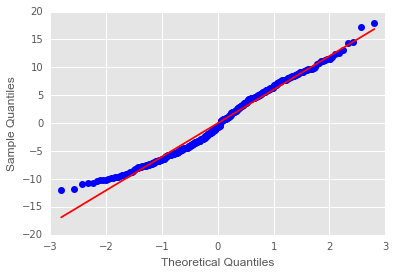

In [104]:
figure = sm.qqplot(model.resid, line = 's')

In [105]:
model = smf.ols(formula = 'mpg ~ horsepower + model_year + horsepower * model_year', data = df).fit()

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     392.5
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          4.00e-117
Time:                        19:29:47   Log-Likelihood:                -1087.8
No. Observations:                 392   AIC:                             2184.
Df Residuals:                     388   BIC:                             2199.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept              -126.6089     12.117    -10.449      0.000      -150.433  -102.785
horsepower                1.0457      0.115      9.063      0.000         0.819     1.273
model_year                2.1920      0.161     13.585      0.000         1.875     2.509
horsepower:model_year    -0.0160      0.002    -10.217      0.000        -0.019    -0.013
==============================================================================
Omnibus:                       15.364   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.956
Skew:                           0.332   Prob(JB):                     2.81e-05
Kurtosis:                       3.918   Cond. No.                     5.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

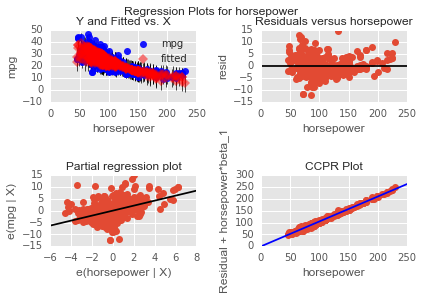

In [107]:
figure = sm.graphics.plot_regress_exog(model, 'horsepower')

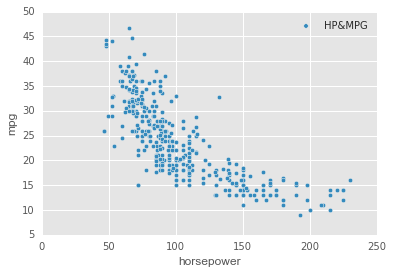

In [108]:
df[['horsepower', 'mpg']].plot(x='horsepower', y= 'mpg', kind = 'scatter', label = 'HP&MPG')

need to linerize data (e.g. log, square, inverse)

In [110]:
df[ ['displacement_sqrt', 'horsepower_sqrt'] ] = df[ ['displacement', 'horsepower'] ].apply(np.sqrt)

In [111]:
df[ ['displacement_log', 'horsepower_log'] ] = df[ ['displacement', 'horsepower'] ].apply(np.log10)
df[ ['displacement_sqrt', 'horsepower_sqrt'] ] = df[ ['displacement', 'horsepower'] ].apply(np.sqrt)
df[ ['displacement_square', 'horsepower_sqare'] ] = df[ ['displacement', 'horsepower'] ].apply(np.square)

In [113]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg                  1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders           -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement        -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower          -0.778427   0.842983      0.897257    1.000000  0.864538   
weight              -0.831741   0.896017      0.932824    0.864538  1.000000   
...                       ...        ...           ...         ...       ...   
horsepower_sqrt     -0.802311   0.849266      0.897344    0.995152  0.875859   
displacement_log    -0.828392   0.942217      0.979369    0.854590  0.936372   
horsepower_log      -0.817517   0.843204      0.886477    0.980201  0.876483   
displacement_square -0.750854   0.912560      0.981828    0.910831  0.895213   
horsepower_sqare    -0.712297   0.799052      0.868595    0.982807  0.815723   

                           ...         horsepower_sqrt  displacement_log  \
mpg                        ...               -0.802311         -0.828392   
cylinders                  ...                0.849266          0.942217   
displacement               ...                0.897344          0.979369   
horsepower                 ...                0.995152          0.854590   
weight                     ...                0.875859          0.936372   
...                        ...                     ...               ...   
horsepower_sqrt            ...                1.000000          0.868500   
displacement_log           ...                0.868500          1.000000   
horsepower_log             ...                0.994867          0.872149   
displacement_square        ...                0.897610          0.925185   
horsepower_sqare           ...                0.960308          0.802495   

                     horsepower_log  displacement_square  horsepower_sqare  
mpg                       -0.817517            -0.750854         -0.712297  
cylinders                  0.843204             0.912560          0.799052  
displacement               0.886477             0.981828          0.868595  
horsepower                 0.980201             0.910831          0.982807  
weight                     0.876483             0.895213          0.815723  
...                             ...                  ...               ...  
horsepower_sqrt            0.994867             0.897610          0.960308  
displacement_log           0.872149             0.925185          0.802495  
horsepower_log             1.000000             0.873585          0.928337  
displacement_square        0.873585             1.000000          0.906971  
horsepower_sqare           0.928337             0.906971          1.000000  

[13 rows x 13 columns]

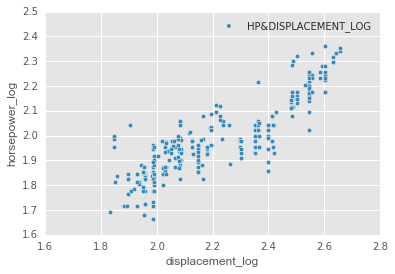

In [116]:
df[['displacement_log', 'horsepower_log']].plot(x='displacement_log', y= 'horsepower_log', kind = 'scatter', label = 'HP&DISPLACEMENT_LOG')

In [117]:
#inverse function 
df['horsepower_inv'] = 1/df.horsepower

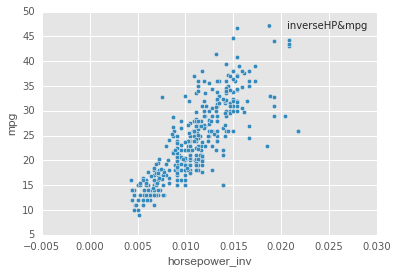

In [120]:
df[['mpg', 'horsepower_inv']].plot(x='horsepower_inv', y= 'mpg', kind = 'scatter', label = 'inverseHP&mpg')

## should do GPM (gallon per miles) instead of MPG 

In [141]:
#define the variable 
##ADD GPM TO DATA FRAME##

#http://www.popularmechanics.com/cars/a12367/4324986/

df['gpm'] = 1. / df.mpg

In [142]:
sorted(df.cylinders.unique())

[3, 4, 5, 6, 8]

In [143]:
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

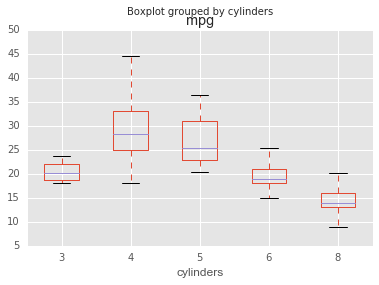

In [144]:
df.boxplot('mpg', by = 'cylinders')

In [145]:
df.corr().cylinders

mpg                   -0.775396
cylinders              1.000000
displacement           0.950721
horsepower             0.842983
weight                 0.896017
                         ...   
horsepower_log         0.843204
displacement_square    0.912560
horsepower_sqare       0.799052
horsepower_inv        -0.793819
gpm                    0.839278
Name: cylinders, dtype: float64

    NOTES: see that cylinders have a high correlation with displacement_square & gpm

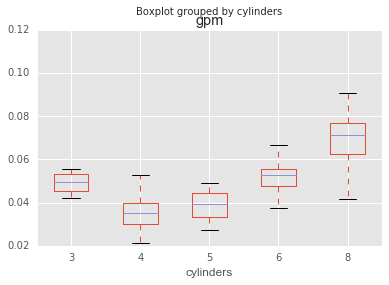

In [146]:
df.boxplot('gpm', by = 'cylinders')

In [149]:
#weight, horsepower, displacement, acceleration 

##REMOVE CYLINDERS

### Displacement_SQRT & GPM

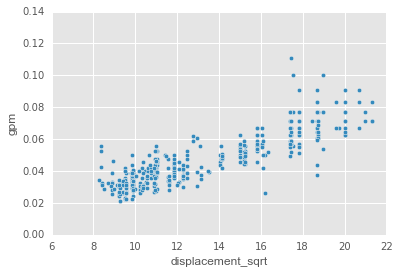

In [148]:
df.plot('displacement_sqrt', 'gpm', kind = 'scatter')

# NOTE: TRY EVERY COMBO 

### gpm, cylinders, displacement_sqrt, horsepoer_sqrt, weight

In [150]:
df[['gpm', 'cylinders', 'displacement_sqrt', 'horsepower_sqrt', 'weight']].corr()

gpm  cylinders  displacement_sqrt  horsepower_sqrt  \
gpm                1.000000   0.839278           0.866133         0.859499   
cylinders          0.839278   1.000000           0.952891         0.849266   
displacement_sqrt  0.866133   0.952891           1.000000         0.886470   
horsepower_sqrt    0.859499   0.849266           0.886470         1.000000   
weight             0.885219   0.896017           0.939395         0.875859   

                     weight  
gpm                0.885219  
cylinders          0.896017  
displacement_sqrt  0.939395  
horsepower_sqrt    0.875859  
weight             1.000000

In [151]:
##remove cylinders from above data (a few steps ago)

df.drop('cylinders', axis = 1, inplace = True)

In [153]:
df.columns

Index([u'mpg', u'displacement', u'horsepower', u'weight', u'acceleration',
       u'model_year', u'car_name', u'displacement_sqrt', u'horsepower_sqrt',
       u'displacement_log', u'horsepower_log', u'displacement_square',
       u'horsepower_sqare', u'horsepower_inv', u'gpm'],
      dtype='object')

In [176]:
df.corr()

mpg  displacement  horsepower    weight  \
mpg                  1.000000     -0.804203   -0.778427 -0.831741   
displacement        -0.804203      1.000000    0.897257  0.932824   
horsepower          -0.778427      0.897257    1.000000  0.864538   
weight              -0.831741      0.932824    0.864538  1.000000   
acceleration         0.420289     -0.543684   -0.689196 -0.417457   
...                       ...           ...         ...       ...   
horsepower_log      -0.817517      0.886477    0.980201  0.876483   
displacement_square -0.750854      0.981828    0.910831  0.895213   
horsepower_sqare    -0.712297      0.868595    0.982807  0.815723   
horsepower_inv       0.816767     -0.831923   -0.920325 -0.843741   
gpm                 -0.935364      0.866631    0.854809  0.885219   

                     acceleration    ...     horsepower_log  \
mpg                      0.420289    ...          -0.817517   
displacement            -0.543684    ...           0.886477   
horsepower              -0.689196    ...           0.980201   
weight                  -0.417457    ...           0.876483   
acceleration             1.000000    ...          -0.698328   
...                           ...    ...                ...   
horsepower_log          -0.698328    ...           1.000000   
displacement_square     -0.575005    ...           0.873585   
horsepower_sqare        -0.659113    ...           0.928337   
horsepower_inv           0.683397    ...          -0.978658   
gpm                     -0.455750    ...           0.853836   

                     displacement_square  horsepower_sqare  horsepower_inv  \
mpg                            -0.750854         -0.712297        0.816767   
displacement                    0.981828          0.868595       -0.831923   
horsepower                      0.910831          0.982807       -0.920325   
weight                          0.895213          0.815723       -0.843741   
acceleration                   -0.575005         -0.659113        0.683397   
...                                  ...               ...             ...   
horsepower_log                  0.873585          0.928337       -0.978658   
displacement_square             1.000000          0.906971       -0.795652   
horsepower_sqare                0.906971          1.000000       -0.839141   
horsepower_inv                 -0.795652         -0.839141        1.000000   
gpm                             0.840601          0.819141       -0.810579   

                          gpm  
mpg                 -0.935364  
displacement         0.866631  
horsepower           0.854809  
weight               0.885219  
acceleration        -0.455750  
...                       ...  
horsepower_log       0.853836  
displacement_square  0.840601  
horsepower_sqare     0.819141  
horsepower_inv      -0.810579  
gpm                  1.000000  

[14 rows x 14 columns]

In [175]:
model = smf.ols(formula = 'gpm ~ displacement_sqrt + horsepower + displacement_sqrt * horsepower', data = df).fit()
model.summary()

#F should be more than 4 (?)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     494.5
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          3.73e-132
Time:                        20:51:08   Log-Likelihood:                 1358.3
No. Observations:                 392   AIC:                            -2709.
Df Residuals:                     388   BIC:                            -2693.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                       -0.0160      0.005     -3.229      0.001        -0.026    -0.006
displacement_sqrt                0.0031      0.000      8.903      0.000         0.002     0.004
horsepower                       0.0004   6.06e-05      5.801      0.000         0.000     0.000
displacement_sqrt:horsepower -9.639e-06   3.17e-06     -3.038      0.003     -1.59e-05  -3.4e-06
==============================================================================
Omnibus:                       28.410   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.498
Skew:                           0.356   Prob(JB):                     3.63e-15
Kurtosis:                       4.888   Cond. No.                     2.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
df['age'] = 2016 - df.model_year

In [183]:
df.columns

Index([u'mpg', u'displacement', u'horsepower', u'weight', u'acceleration',
       u'model_year', u'car_name', u'displacement_sqrt', u'horsepower_sqrt',
       u'displacement_log', u'horsepower_log', u'displacement_square',
       u'horsepower_sqare', u'horsepower_inv', u'gpm', u'age'],
      dtype='object')

In [184]:
df.head()

mpg  displacement  horsepower  weight  acceleration  ...   \
0  18.0         307.0       130.0  3504.0          12.0  ...    
1  15.0         350.0       165.0  3693.0          11.5  ...    
2  18.0         318.0       150.0  3436.0          11.0  ...    
3  16.0         304.0       150.0  3433.0          12.0  ...    
4  17.0         302.0       140.0  3449.0          10.5  ...    

   displacement_square horsepower_sqare  horsepower_inv       gpm   age  
0              94249.0          16900.0        0.007692  0.055556  1946  
1             122500.0          27225.0        0.006061  0.066667  1946  
2             101124.0          22500.0        0.006667  0.055556  1946  
3              92416.0          22500.0        0.006667  0.062500  1946  
4              91204.0          19600.0        0.007143  0.058824  1946  

[5 rows x 16 columns]

In [190]:
model = smf.ols(formula = 'gpm ~ weight + age + horsepower_sqrt + age * horsepower_sqrt', data = df).fit()
model.summary()

#model-year = age of car

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     718.8
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          1.23e-177
Time:                        20:58:29   Log-Likelihood:                 1467.7
No. Observations:                 392   AIC:                            -2925.
Df Residuals:                     387   BIC:                            -2906.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -1.2314      0.930     -1.325      0.186        -3.059     0.596
weight               1.242e-05    7.2e-07     17.255      0.000       1.1e-05  1.38e-05
age                     0.0006      0.000      1.319      0.188        -0.000     0.002
horsepower_sqrt        -0.1295      0.094     -1.376      0.170        -0.315     0.056
age:horsepower_sqrt  6.758e-05   4.84e-05      1.395      0.164     -2.77e-05     0.000
==============================================================================
Omnibus:                       63.497   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.979
Skew:                           0.799   Prob(JB):                     4.96e-35
Kurtosis:                       5.668   Cond. No.                     6.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    NOTES: r2 = 0.880 (high)

In [189]:
model = smf.ols(formula = 'gpm ~ 0 + weight + horsepower + weight * horsepower', data = df).fit()
model.summary()

#0  --> force intercept to 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     6382.
Date:                Thu, 09 Jun 2016   Prob (F-statistic):               0.00
Time:                        20:58:12   Log-Likelihood:                 1380.8
No. Observations:                 392   AIC:                            -2756.
Df Residuals:                     389   BIC:                            -2744.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
weight             1.078e-05   6.81e-07     15.841      0.000      9.45e-06  1.21e-05
horsepower            0.0001   2.54e-05      5.192      0.000      8.21e-05     0.000
weight:horsepower  5.636e-09   3.81e-09      1.480      0.140     -1.85e-09  1.31e-08
==============================================================================
Omnibus:                       20.590   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.387
Skew:                           0.385   Prob(JB):                     1.53e-07
Kurtosis:                       4.153   Cond. No.                     2.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    NOTES: r-squared = 0.98

## Split the dataset into a training set (60%) and a testing set (the rest)

In [158]:
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

In [166]:
train_df.columns

Index([u'mpg', u'displacement', u'horsepower', u'weight', u'acceleration',
       u'model_year', u'car_name', u'displacement_sqrt', u'horsepower_sqrt',
       u'displacement_log', u'horsepower_log', u'displacement_square',
       u'horsepower_sqare', u'horsepower_inv', u'gpm'],
      dtype='object')

In [196]:
df.gpm.value_counts()

0.076923    20
0.071429    19
0.055556    17
0.066667    16
0.038462    14
            ..
0.022573     1
0.030488     1
0.050505     1
0.031949     1
0.027473     1
Name: gpm, dtype: int64

##  ?????

In [ ]:
train_x = train_df[['displacement', 'horsepower_sqrt']]

In [192]:
names_X = ['displacement_sqrt', 'horsepower_sqrt', 'weight', 'acceleration']

def X_y(df):
    X = df[ names_X ]
    y = df.gpm
    return X, y

train_X, train_y = X_y(train_df)
test_X, test_y = X_y(test_df)

In [194]:
linear_model = smf.ols(formula = 'train_y ~ train_x', data = train_df).fit()

NameError: name 'train_x' is not defined

In [191]:
model = linear_model.LogisticRegression()
model.fit(train_X, train_y)

print 'intercept    =', model.intercept_
print 'coefficients =', model.coef_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# LOAD DATA AGAIN - Ivan notes

In [197]:
df = pd.read_csv(os.path.join('..', 'datasets', 'auto-mpg.csv'))

In [198]:
df['gpm'] = 1. / df.mpg
df['horsepower_sqrt'] = np.sqrt(df.horsepower)

In [199]:

df = df.dropna(axis = 0, subset = ['gpm', 'displacement', 'horsepower_sqrt', 'weight'])

### CREATE TRAIN & TEST DATA

In [201]:
train_df = df.sample(frac = .6, random_state = 1)
test_df = df.drop(train_df.index)

## cylinders, horsepower_sqrt, weight

### create x and y variables

In [202]:
train_X = train_df[ ['cylinders', 'horsepower_sqrt', 'weight'] ]
train_y = train_df['gpm']

#put capital X b/c x is a dataframe 
#y is a series 

### create model

In [208]:
model = linear_model.LinearRegression()

model.fit(train_X, train_y)
#training response
#dont need to do when do cross_validation

print model.score(train_X, train_y)
#score  = 0.8126... (R2)

print cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()
#10 = take 10 subsets of data; hold off 10% of the data for training; go through --> use training data 9 timex, use testing data once
#if don't put mean, get 10 diff scores

0.812602532292
0.787735316391


## horsepower_sqrt & weight

In [213]:
train_X = train_df[ ['horsepower_sqrt', 'weight'] ]
train_y = train_df['gpm']

model = linear_model.LinearRegression()

#model.fit(train_X, train_y)

#print model.score(train_X, train_y)

print cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.789219068589


## cylinders & weight

In [214]:
train_X = train_df[ ['cylinders', 'weight'] ]
train_y = train_df['gpm']

model = linear_model.LinearRegression()

#model.fit(train_X, train_y)

#print model.score(train_X, train_y)

print cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.749686726631


## cylinders & horsepower_sqrt

In [216]:
train_X = train_df[ ['cylinders', 'horsepower_sqrt'] ]
train_y = train_df['gpm']

model = linear_model.LinearRegression()

#model.fit(train_X, train_y)

#print model.score(train_X, train_y)

print cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.756078244851


## horsepower_sqrt, weight, interaction (horsepower_sqrt * weight)

In [217]:
#train_df['horsepower_sqrt' * 'weight']  ##ADDD INFO - NOT COMPLETE 

In [ ]:
##AFTER LOOK AT MODEL'S R2, IF ITS THE SAME AS OTHER R2 (BEGINING OF MODEL) THEN GOOD MODEL 